In [19]:
from timuscle.dataio import loadHDF5asdict
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
from dispest import calc_kasai

In [20]:
data = loadHDF5asdict("../output.h5")
lat = data['lat']
axial = data['axial']

ex_axlat = 1E3*np.array([lat[0], lat[-1], axial[-1], axial[0]])

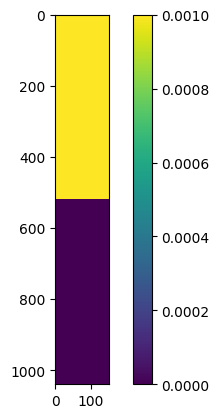

In [47]:
plt.figure()
plt.imshow(np.abs(data['bmodes'][0,0]), vmax=1E-3)
plt.colorbar()
plt.show()

In [22]:
IQ = hilbert(np.mean(data['bmodes'], axis=1), axis=1)
I = IQ.real
Q = IQ.imag

In [23]:
I.shape

(89, 1040, 151)

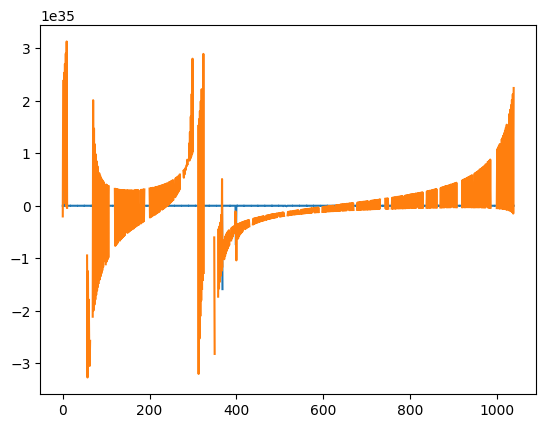

In [24]:
plt.figure()
plt.plot(I[0,:,100])
plt.plot(Q[0,:,100])
plt.show()

In [25]:
vel = calc_kasai(I, Q, taxis=0, fd=5.2E6, ksize=24, kaxis=1, mode='differential')/0.3

/tmp/ipykernel_221293/630015442.py:1: RuntimeWarning: invalid value encountered in multiply
  env = np.abs(np.mean(I[0:1,:,:] + 1j*Q[0:1,:,:], axis=0))


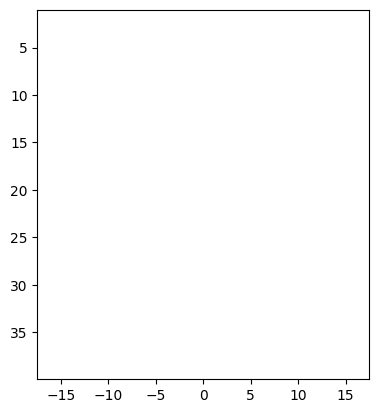

In [26]:
env = np.abs(np.mean(I[0:1,:,:] + 1j*Q[0:1,:,:], axis=0))
logged = 20 * np.log10(env/np.percentile(env, 99))
plt.figure()
plt.imshow(logged, vmin=-35, vmax=5, cmap='gray', extent=ex_axlat)
plt.show()

In [27]:
from dispest import demod_tensor

In [28]:
IQdemod, ifmin, ifmax, fseff = demod_tensor(I, fs = 5.2E6*4, fmin=1E6, fmax=8E6, taxis=1)

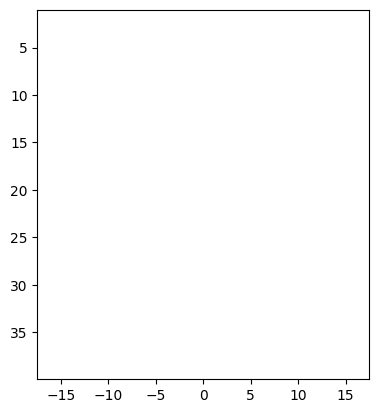

In [29]:
IQdemod.shape

env = np.abs(np.mean(IQdemod[0:1], axis=0))
logged = 20 * np.log10(env/np.percentile(env, 99))
plt.figure()
plt.imshow(logged, vmin=-35, vmax=5, cmap='gray', extent=ex_axlat)
plt.show()

In [30]:
demodquick = np.fft.ifft(np.fft.ifftshift(np.fft.rfft(I, axis=1), axes=1), axis=1)

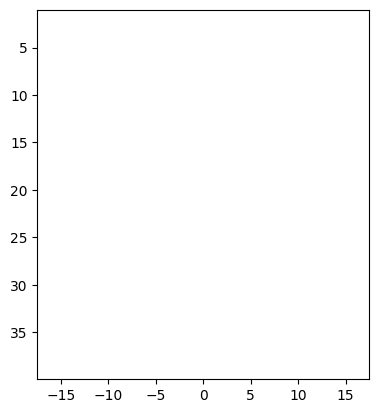

In [31]:
env = np.abs(np.mean(demodquick[0:1], axis=0))
logged = 20 * np.log10(env/np.percentile(env, 99))
plt.figure()
plt.imshow(logged, vmin=-35, vmax=5, cmap='gray', extent=ex_axlat)
plt.show()

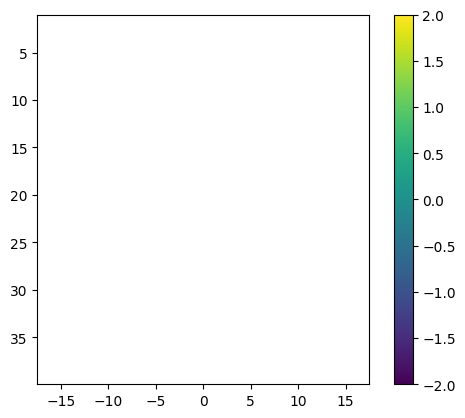

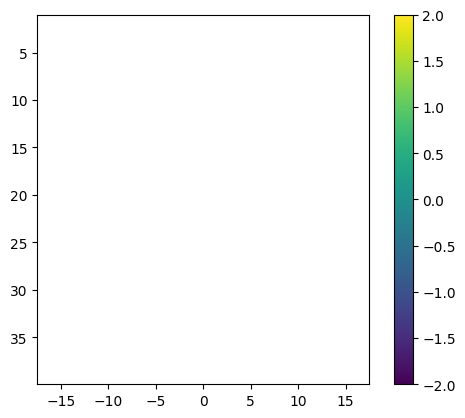

In [32]:
plt.figure()
plt.imshow(vel[10], extent=ex_axlat, vmin=-2, vmax=2)
plt.colorbar()
plt.show()
plt.figure()
plt.imshow(vel[11], extent=ex_axlat, vmin=-2, vmax=2)
plt.colorbar()
plt.show()

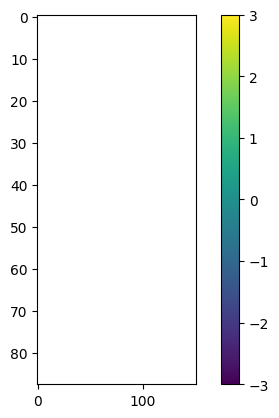

In [33]:
plt.figure()
plt.imshow(vel[:, vel.shape[1]//2], vmin=-3, vmax=3, aspect=4, interpolation='none')
plt.colorbar()
plt.show()

In [34]:
IQ = np.mean(data['demod'], axis=1)
I = IQ.real
Q = IQ.imag

In [35]:
vel = calc_kasai(I, Q, taxis=0, fd=5.2E6, ksize=12, kaxis=1, mode='differential')/0.3

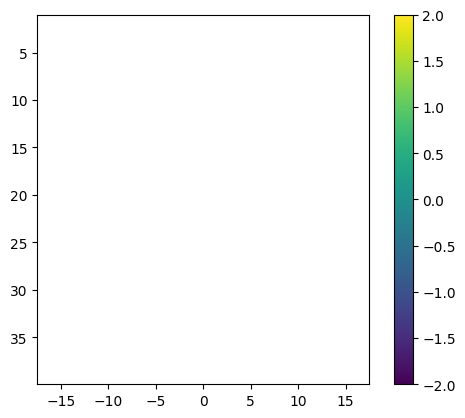

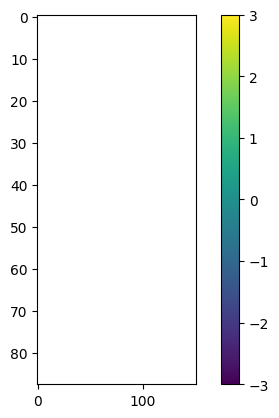

In [36]:
plt.figure()
plt.imshow(vel[10], extent=ex_axlat, vmin=-2, vmax=2)
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(vel[:, vel.shape[1]//2], vmin=-3, vmax=3, aspect=4)
plt.colorbar()
plt.show()